In [1]:
pip install pandas matplotlib numpy requests

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [426]:
import pandas as pd
import requests
import numpy as np
import matplotlib as plt
from matplotlib import pyplot

In [427]:
file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [428]:
file_name="usedcars.csv"
response = requests.get(file_path)
with open (file_name , "wb") as f:
    f.write(response.content)

### Load the dataset to a pandas dataframe:

In [429]:
df = pd.read_csv(file_name , header = None)
print(df.head(5))

   0    1            2    3    4     5            6    7      8     9   ...  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  ...   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  ...   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  ...   

    16    17    18    19    20   21    22  23  24     25  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  13495  
1  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
2  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
3  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
4  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  

[5 rows x 26 columns]


In [430]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [431]:
df = pd.read_csv(file_name, names = headers)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Identify and handle missing values

In [432]:
df.replace("?" , np.nan , inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4>Evaluating for Missing Data</h4>

In [433]:
missing_data = df.isnull()  # "True" means the value is a missing value while "False" means the value is not a missing value.
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [434]:
df.columns[df.isnull().any()]    # All Columns who have missing values

Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. "True" represents a missing value and "False" means the value is present in the data set.  In the body of the for loop the method " .value_counts()" counts the number of "True" values. 
</p>

In [479]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: count, dtype: int64

normalized-losses
False    164
True      41
Name: count, dtype: int64

make
False    205
Name: count, dtype: int64

fuel-type
False    205
Name: count, dtype: int64

aspiration
False    205
Name: count, dtype: int64

num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
False    205
Name: count, dtype: int64

drive-wheels
False    205
Name: count, dtype: int64

engine-location
False    205
Name: count, dtype: int64

wheel-base
False    205
Name: count, dtype: int64

length
False    205
Name: count, dtype: int64

width
False    205
Name: count, dtype: int64

height
False    205
Name: count, dtype: int64

curb-weight
False    205
Name: count, dtype: int64

engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
False    205
Name: count, dtype: int64

engine-size
False    205
Name: count, dtype: int64

fuel-system
False    205
Name: count, dtype: int64

bore
False    201
True       4
Name: count, dtype: 

In [436]:
df[df['num-of-doors'].isnull()]    # Rows of particular column where data are missing

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [437]:
df['normalized-losses'].isnull().sum()  # This will show how many columns have missing data.

np.int64(41)

### Deal with missing data
<b>How should we deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


we should only drop whole columns if most entries in the column are empty. In the data set, none of the columns are empty enough to drop entirely.
we have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. Apply each method to different columns:

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: we want to predict price. we cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to us.</li>
        </ul>
    </li>
</ul>


In [438]:
avg_norm_loss = df["normalized-losses"].astype('float').mean(axis = 0)    # Average of Normalized losses
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [439]:
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, avg_norm_loss)   # Replace "NaN" with mean value in "normalized-losses" column

In [440]:
avg_bore = df['bore'].astype('float').mean(axis = 0)
print("Average of Bore:" , avg_bore)

Average of Bore: 3.3297512437810943


In [441]:
df['bore'] = df['bore'].replace(np.nan, avg_bore)  # Replace "NaN" with the mean value in the "bore" column

In [442]:
avg_stroke = df['stroke'].astype('float').mean(axis =0)
print("Average of Stroke" , avg_stroke)

Average of Stroke 3.255422885572139


In [443]:
df['stroke'] = df['stroke'].replace(np.nan,avg_stroke)

In [444]:
value = df.at[56,'stroke']   # Verify the value has changed
value

np.float64(3.255422885572139)

In [445]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [446]:
df['horsepower'] = df['horsepower'].replace(np.nan,avg_horsepower)

In [447]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [448]:
df['peak-rpm'] = df['peak-rpm'].replace(np.nan,avg_peakrpm)

In [449]:
df['num-of-doors'].value_counts()


num-of-doors
four    114
two      89
Name: count, dtype: int64

In [450]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [451]:
df["num-of-doors"] = df["num-of-doors"].replace(np.nan, "four")

In [452]:
value = df.at[63, 'num-of-doors']
value

'four'

In [453]:
df.dropna(subset = 'price' , axis = 0 )
df.reset_index(drop=True)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Correct data format
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, you use:
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


In [454]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [455]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [456]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Standardization
<p>
we usually collect data from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where you subtract the mean and divide by the standard deviation.)
</p>


In [457]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [458]:
df["highway-mpg"] = 235/df["highway-mpg"]

df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)  # rename column name from "highway-mpg" to "highway-L/100km"

## Data Normalization

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include 
<ol>
    <li>scaling the variable so the variable average is 0</li>
    <li>scaling the variable so the variance is 1</li> 
    <li>scaling the variable so the variable values range from 0 to 1</li>
</ol>
</p>


In [459]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

In [460]:
df[["length","width","height"]].head()  # the scaled columns from 0 to 1

,length,width,height
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


## Binning
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<p>
    In your data set, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower. we can rearrange them into three ‘bins' to simplify analysis
</p>

In [461]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower bins')

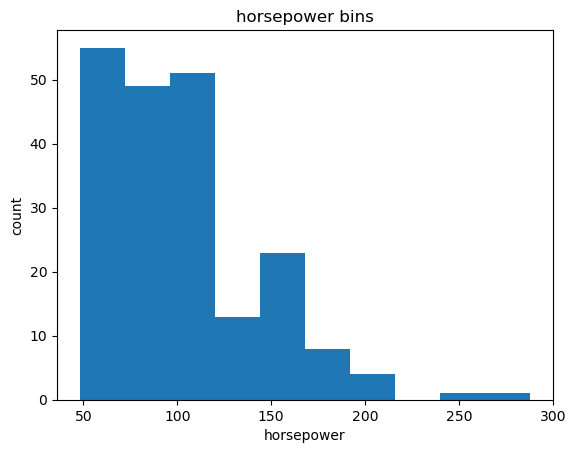

In [462]:
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [463]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [464]:
group_names = ['Low', 'Medium', 'High']

In [465]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,160,Medium


In [466]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       163
Medium     40
High        2
Name: count, dtype: int64

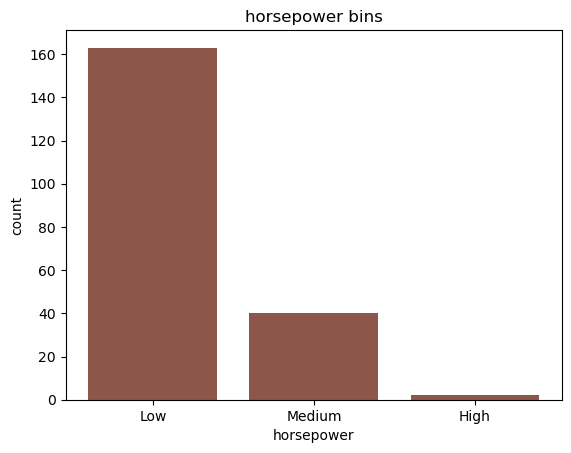

In [475]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

plt.pyplot.show()

## Indicator Variable
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why use indicator variables?</b>
<p>
    we use indicator variables so we can use categorical variables for regression analysis.
</p>
<p>
    The column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we can convert "fuel-type" to indicator variables.
</p>

<p>
    Use the Panda method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [ ]:
dummy_variable_gas = pd.get_dummies(df["fuel-type"])
dummy_variable_gas.head()

In [363]:
dummy_variable_gas.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_gas.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [364]:
df = pd.concat([df, dummy_variable_gas], axis=1)

df.drop("fuel-type", axis = 1, inplace=True)  # drop original column "fuel-type" from "df"

In [470]:
dummy_variable_aspiration = pd.get_dummies(df['aspiration'])

dummy_variable_aspiration.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_aspiration.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [471]:
df = pd.concat([df, dummy_variable_aspiration], axis=1)

df.drop('aspiration', axis = 1, inplace=True)

In [367]:
df.to_csv('clean_autofile.csv')     # Save new CSV file